In [75]:
#импортируем биб-ки, нужные для построения модели и графиков
import numpy as np #для работы с массивами и прочими мат.вычислениями
import pandas as pd #для работы с данными - датафреймы
import matplotlib.pyplot as plt #для работы с графиками
from sklearn.linear_model import LinearRegression #для построения моделей, линейная регрессия в данном случае, её задача - построить прогноз.

In [76]:
data = pd.read_csv('data_for_regression.csv') #считываем исходный файл в набор данных data
data = data.dropna() #удаляем нулевые значения из считанного набора данных

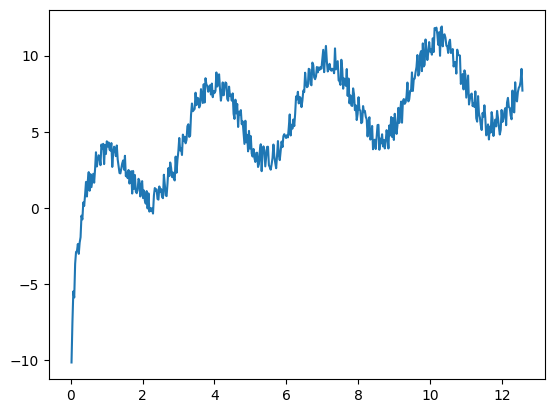

In [77]:
#график начальных данных - зависимость x от y:
x = data['x']
y = data['y']
m, b = np.polyfit(x, y, 1)
plt.plot(x, y)
plt.show()

In [78]:
from sklearn.model_selection import train_test_split #для разбиения исходной выборки на обучающую и тестовую выборки в соотношении 80%/20%.
num_features = ['x'] #просто для красоты, чтобы показать, что можно обращаться и так к столбцу
X_train, X_test, y_train, y_test = train_test_split(data[num_features], data['y'], test_size=0.2, shuffle=False)#80/20 80% - это тренировочные данные, 20% - тестовые

In [82]:
df_x = pd.DataFrame(data[num_features]) #загоняем в датафрейм наш исходный столбец x

In [83]:
df_x #просто смотрим на наш x исходный

,x
0,0.025183
1,0.050366
2,0.075549
3,0.100732
4,0.125916
...,...
494,12.465638
495,12.490821
496,12.516004
497,12.541188


In [84]:
model_LR = LinearRegression().fit(X_train, y_train) # строим модель линейной регрессии и обучем её (обучение - команда .fit)

In [87]:
X_test = df_x.iloc[15:] #берем x от 15-й позиции до конца
prediction = model_LR.predict(X_test) #прогоняем нашу модель линейной регрессии по данным х от 15-й позиции до конца - получаем прогнозные значения y
df_test_z = pd.DataFrame()#заводим новую оболочку под х и расчётный у (y назовём z)
df_test_z["x"] = X_test #загоняем х в датафрейм
df_test_z["z"] = prediction #добавляем в наш НД расчетное значение y - загоняем его в датафрейм
#пишем в файл результат, колонки x и z:
df_test_z.to_csv("data_regression_test_model_LR.csv", index=False)
print("Результаты прогноза модели, построенной методом линейной регрессии выгружены в файл data_regression_test_model_LR.csv")
print("Файл хранится в той же папке, откуда запускается эта IDE")

Результаты прогноза модели, построенной методом линейной регрессии выгружены в файл data_regression_test_model_LR.csv
Файл хранится в той же папке, откуда запускается эта IDE


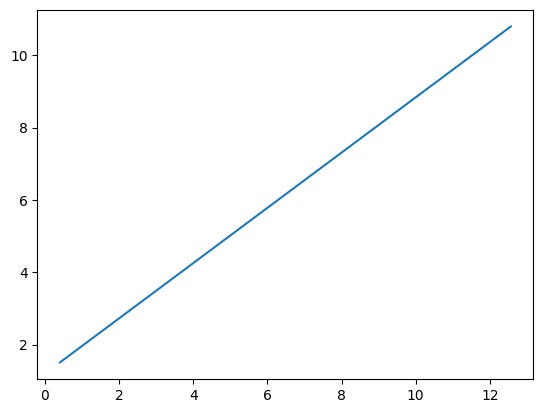

In [88]:
#график прогнозируемых данных - зависимость x (от 15-го значения до последнего значения) от y (который посчитала модель линейной регрессии):
x = df_test_z["x"]
y = df_test_z["z"]
plt.plot(x, y)
plt.show()